<a href="https://colab.research.google.com/github/ladiyusuph/MNIST_digit_classification/blob/main/MNISST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the dependencies
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(9090)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
#Loading the mnist data from keras.datasts
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [3]:
#Viewing the data type
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

#Viewing the shape of the dataframe
print(X_train.shape,X_test.shape)
print(y_train.shape, y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [4]:
#Printing an image from the dataframe
print(X_train[90])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  25
  214 225  90   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   7 145 212
  253 253  60   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 106 253 253
  246 188  23   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  45 164 254 253 223
  108   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  24 236 253 252 124  28
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 100 217 253 218 116   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 158 175 225 253  92   

In [5]:
#Viewing the shape of the image
print(X_train[90].shape)

(28, 28)


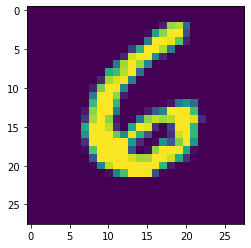

The image label is 6


In [6]:
#Visualing the image
plt.imshow(X_train[90])
plt.show()

#printing the label of the image
print(f"The image label is {y_train[90]}")

In [7]:
#Viewing the values of image labels

#Unique values in y_train
print(np.unique(y_train))

#Unique vlaues in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [8]:
#Statistical summary of the df
#Mean
print(X_train.mean())

#Std
print(X_train.std())

#Max
print(np.max(X_train))

#Min
print(np.min(X_train))

33.318421449829934
78.56748998339798
255
0


In [9]:
#Scaling the data

train_scaled = X_train/255
test_scaled = X_test/255

print(train_scaled.std())

0.3081078038564622


In [10]:
print(train_scaled[90])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.09803922
  0.83921569 0.88235294 0.35294118 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.       

Building the Model

In [11]:
#Loading the model

model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(units = 50, activation = 'relu'),
    Dense(units = 30, activation = 'relu'),
    Dense(units = 15, activation = 'relu'),
    Dense(units = 10, activation = 'linear')
])

In [12]:
#Specifying the loss and cost function
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer = 'adam', 
              loss = SparseCategoricalCrossentropy(from_logits = True), metrics =['accuracy'])

In [13]:
#Training the data
history = model.fit(train_scaled, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3353 - accuracy: 0.9000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1445 - accuracy: 0.9568
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1092 - accuracy: 0.9671
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0892 - accuracy: 0.9723
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0748 - accuracy: 0.9765
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0631 - accuracy: 0.9811
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0554 - accuracy: 0.9823
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0501 - accuracy: 0.9838
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0436 - accuracy: 0.9865
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0

In [14]:
#Making a prediction
logits = model(test_scaled)

pred = tf.nn.softmax(logits)

#Print the prediction
print(pred[0])

tf.Tensor(
[1.0862539e-11 2.7335639e-10 5.1677785e-07 3.1160994e-06 5.4070463e-13
 8.5525927e-11 2.4158432e-17 9.9999601e-01 8.6171070e-11 3.7615425e-07], shape=(10,), dtype=float32)


In [15]:
yp_label = [np.argmax(i) for i in pred]
print(yp_label)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 0, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 1, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

### Model Evaluation

In [16]:
loss, accuracy = model.evaluate(test_scaled, y_test)

print(f"The Model has a loss of {loss}")
print(f"The Model accuracy on the test data is {accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.1096 - accuracy: 0.9728
The Model has a loss of 0.10956380516290665
The Model accuracy on the test data is 0.9728000164031982


Model Accuracy on the Test Data is:0.9739000201225281


(10000, 28, 28)


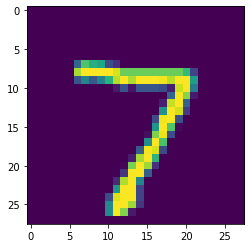

In [17]:
#Printing the shape of the test data
print(test_scaled.shape)

#Displaying the first data in the test data
plt.imshow(test_scaled[0])
plt.show()

In [18]:
#Printing the true label of the the image
print(f"The Image true label is {y_test[0]}")

print(f"The model labeled the image as {yp_label[0]}")

The Image true label is 7
The model labeled the image as 7


**The Model Labelled the image correctly**

In [19]:
#Confusion Matrix
matrix = confusion_matrix(y_test,yp_label)

#Print Matrix
print(matrix)

tf.Tensor(
[[ 967    1    0    0    1    3    2    2    1    3]
 [   1 1123    1    3    0    1    1    2    2    1]
 [   5    1 1005    2    7    0    1    8    3    0]
 [   0    0    9  974    0    6    0    9    5    7]
 [   0    0    2    0  967    0    3    1    0    9]
 [   6    2    0    7    4  855    5    1    9    3]
 [   5    3    3    1   14    4  927    0    1    0]
 [   0    2    9    0    4    0    0 1004    1    8]
 [   4    1    6    5    8    7    2    5  931    5]
 [   4    2    0    6   14    2    0    5    1  975]], shape=(10, 10), dtype=int32)


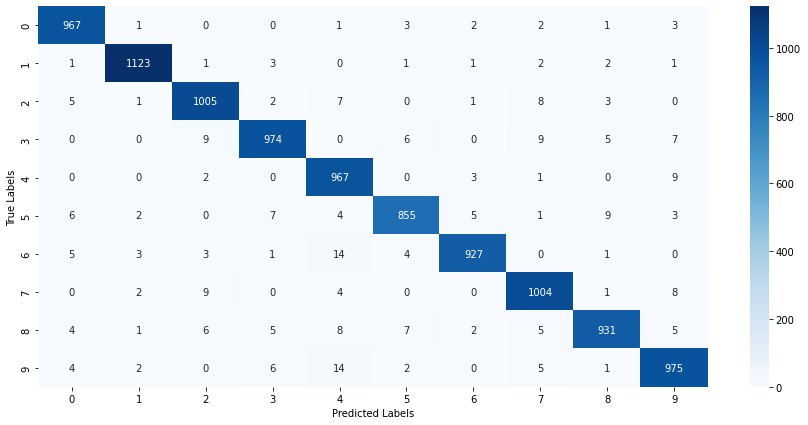

In [20]:
plt.figure(figsize=(15,7))
sns.heatmap(matrix, annot = True, fmt = 'd',cmap = 'Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

Building a Prediction System

<class 'numpy.ndarray'>


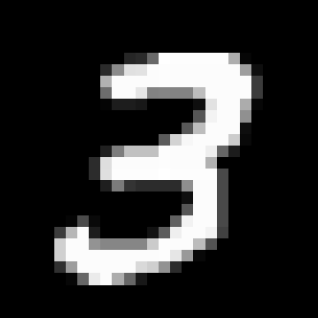

In [21]:
#Loading the image
input_image = '/content/MNIST_digit.png'

#Converting the image to a numpy array
input_ = cv2.imread(input_image)
print(type(input_))

#Viewing the image
cv2_imshow(input_)


In [24]:
#Viewing the shape of the image
input_.shape

(318, 318, 3)

In [25]:
#Converting image to grayscale
grayscale = cv2.cvtColor(input_, cv2.COLOR_RGB2GRAY)
print(grayscale.shape)

#Resizing the image
img_resized = cv2.resize(grayscale, (28,28))
print(img_resized.shape)

#Viewing the resized image
cv2_imshow(img_resized)

(318, 318)
(28, 28)


In [26]:
#Scaling the data 
img_scaled = img_resized /255

In [27]:
#Reshaping the input
img_reshaped = np.reshape(img_scaled, [1,28,28])

In [28]:
#Making a prediction
input_pred = model.predict(img_reshaped)

print(input_pred)

1/1 [==============================] - 0s 181ms/step
[[-20.812838   -7.044963   -6.537705   19.589647  -27.327612   -6.432994
  -20.778006   -3.2793188 -10.424506    1.9178233]]


In [29]:
#Prediction Label
label = np.argmax(input_pred)

print(f"The model has predicted {label} as label of the image")

The model has predicted 3 as label of the image


Predictive System

Enter Image Path: /content/MNIST_digit.png


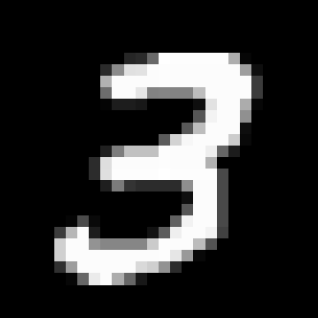

1/1 [==============================] - 0s 18ms/step
The model has predicted 3 as the image label


In [33]:
#Loading the image
image_path = input('Enter Image Path: ')

#Converting the image to a numpy array
img_input = cv2.imread(image_path)
cv2_imshow(img_input)

#Converting image to grayscale
grayscale = cv2.cvtColor(img_input, cv2.COLOR_RGB2GRAY)

#Resizing the image
img_resized = cv2.resize(grayscale, (28,28))

#Scaling the data 
img_scaled = img_resized /255

#Reshaping the input
img_reshaped = np.reshape(img_scaled, [1,28,28])

#Making a prediction
input_pred = model.predict(img_reshaped)

#Prediction Label
label = np.argmax(input_pred)

print(f"The model has predicted {label} as the image label")